<a href="https://colab.research.google.com/github/TiaraFebriyanti/visdat-tiarafebriyanti/blob/main/TLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# General imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns;
import random
import cv2
import pickle
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Specific imports
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

#tesor fow & keras
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D,GlobalMaxPooling2D

from tensorflow.keras.applications import ResNet50 ,Xception,VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from sklearn.ensemble import RandomForestClassifier

#cnn
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.engine.base_layer import Layer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import seaborn as sns

#tesor fow & keras
from sklearn.utils import shuffle
from keras.models import load_model
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications import ResNet50 ,Xception,VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# empty lists to store image paths
syr_img_path = []
mask_img_path = []
glo_img_path = []
drug_img_path = []

for image_path in os.listdir('/content/drive/MyDrive/Waste/syringe/'): # loop through all image names in 'Parasitized' folder
    syr_img_path.append('/content/drive/MyDrive/Waste/syringe/' + image_path) # create the path for the particular image

for image_path in os.listdir('/content/drive/MyDrive/Waste/masks/'): # loop through all image names in 'Uninfected' folder
    mask_img_path.append('/content/drive/MyDrive/Waste/masks/' + image_path) # create the path for the particular image

for image_path in os.listdir('/content/drive/MyDrive/Waste/gloves/'): # loop through all image names in 'Uninfected' folder
    glo_img_path.append('/content/drive/MyDrive/Waste/gloves/' + image_path) # create the path for the particular image

for image_path in os.listdir('/content/drive/MyDrive/Waste/drugs/'): # loop through all image names in 'Uninfected' folder
    drug_img_path.append('/content/drive/MyDrive/Waste/drugs/' + image_path) # create the path for the particular image



cell_type_syr = len(syr_img_path) * ['syringe'] # create a list with all values as 'parasitized' with the length of list being the length of par_img_path
cell_type_mask = len(mask_img_path) * ['masks'] # create a list with all values as 'uninfected' with the length of list being the length of uninf_img_path
cell_type_glo = len(glo_img_path) * ['gloves']
cell_type_drug = len(drug_img_path) * ['drugs']

# create a dataframe with a column containing parasitized images' path and another column with the label from cell_type_par
df_syr = pd.DataFrame({'image_path': syr_img_path, 'cell_type': cell_type_syr})
# create a dataframe with a column containing uninfected images' path and another column with the label from cell_type_uninf
df_mask = pd.DataFrame({'image_path': mask_img_path, 'cell_type': cell_type_mask})
df_glo = pd.DataFrame({'image_path': glo_img_path, 'cell_type': cell_type_glo})
df_drug = pd.DataFrame({'image_path': drug_img_path, 'cell_type': cell_type_drug})

df = pd.concat([df_syr, df_mask, df_glo, df_drug]) # concat both the dataframes along rows to get the final dataframe

df = df.reset_index(drop=True) # reset index to be from 0 to length of dataframe. drop=True drops the initial index, which otherwise is added as a new column
df

,image_path,cell_type
0,/content/drive/MyDrive/Waste/syringe/syringe 1...,syringe
1,/content/drive/MyDrive/Waste/syringe/syringe 1...,syringe
2,/content/drive/MyDrive/Waste/syringe/syringe 1...,syringe
3,/content/drive/MyDrive/Waste/syringe/syringe 1...,syringe
4,/content/drive/MyDrive/Waste/syringe/syringe 1...,syringe
...,...,...
1595,/content/drive/MyDrive/Waste/drugs/istockphoto...,drugs
1596,/content/drive/MyDrive/Waste/drugs/istockphoto...,drugs
1597,/content/drive/MyDrive/Waste/drugs/thumbs_b_c_...,drugs
1598,/content/drive/MyDrive/Waste/drugs/sialan.jpg,drugs


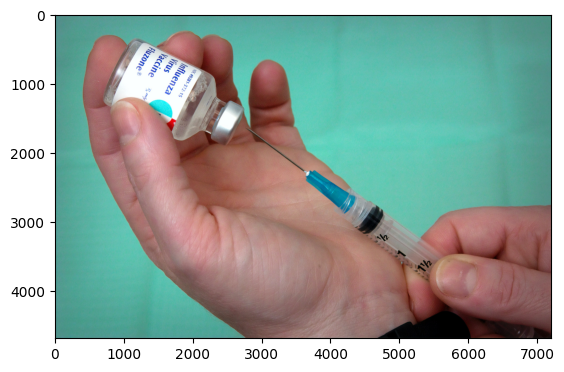

In [4]:
from matplotlib.image import imread
plt.imshow(imread(df['image_path'][0]));

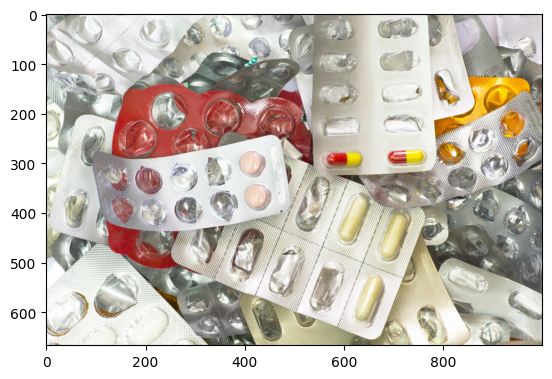

In [5]:
plt.imshow(imread(df['image_path'].iloc[-1]));

In [6]:
#SPLIT TRAIN TEST

train_syr, test_syr = train_test_split(df[df['cell_type'] == 'syringe'],test_size=0.15) # test set is 15% of available data
train_mask, test_mask = train_test_split(df[df['cell_type'] == 'masks'],test_size=0.15) # test set is 15% of available data
train_glo, test_glo = train_test_split(df[df['cell_type'] == 'gloves'],test_size=0.15) # test set is 15% of available data
train_drug, test_drug = train_test_split(df[df['cell_type'] == 'drugs'],test_size=0.15) # test set is 15% of available data

In [7]:
df_train = pd.concat([train_syr, train_mask, train_glo, train_drug])
df_test = pd.concat([test_syr, test_mask, test_glo, test_drug])

In [8]:
df_train.shape

(1360, 2)

In [9]:
df_test.shape

(240, 2)

In [10]:
# Resize all the images to this
IMAGE_SIZE = [150, 150]
# Training config
epochs = 20
batch_size = 32


In [11]:
# Create an instance of ImageDataGenerator
train_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.2,
                               vertical_flip=True,
                               horizontal_flip = True,
                               rescale = 1/255,
                               zoom_range = 0.2,

                              )

test_gen = ImageDataGenerator(rescale = 1/255)

In [12]:
# generate batches for training
training_set =  train_gen.flow_from_dataframe(dataframe = df_train,
                                                  x_col='image_path', # column in `dataframe` that contains the filenames
                                                  y_col='cell_type', # column in `dataframe` that has the target data
                                                  target_size=(150,150), # target image size (length, width)
                                                  shuffle=True,
                                                  batch_size=batch_size); # add batch size

# generate batches for testing
test_set = test_gen.flow_from_dataframe(dataframe = df_test,
                                            x_col='image_path',
                                            y_col='cell_type',
                                            target_size=(150,150),
                                            shuffle=False,
                                            batch_size=batch_size);

Found 1360 validated image filenames belonging to 4 classes.
Found 240 validated image filenames belonging to 4 classes.


In [13]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# Don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
# Create Model
model_vgg = Model(inputs=vgg.input, outputs=prediction)

# View structure of the model
model_vgg.summary()

# Configure model
model_vgg.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [15]:
new_model_vgg = Sequential()
new_model_vgg.add(model_vgg)
new_model_vgg.add(layers.Flatten())
new_model_vgg.add(layers.Dense(1024 ,activation='relu'))
new_model_vgg.add(BatchNormalization())
new_model_vgg.add(layers.Dense(4, activation ='softmax'))
new_model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 4)                 14747460  
                                                                 
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1024)              5120      
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 14,760,776
Trainable params: 44,040
Non-trainable params: 14,716,736
_______________________________________

In [16]:
new_model_vgg.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit the model

r = new_model_vgg.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=epochs,
)

<ipython-input-17-5bf912247dc5>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = new_model_vgg.fit_generator(


Epoch 1/20


In [ ]:
print("Final training accuracy = {}".format(r.history["accuracy"][-1]))
print("Final validation accuracy = {}".format(r.history["val_accuracy"][-1]))

In [ ]:
loss, accuracy = new_model_vgg.evaluate_generator(test_set)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

In [ ]:
# Plot the train and validation loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the train and validation accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
predictions = new_model_vgg.predict(test_set)
predictions = np.argmax(predictions,axis=1)

In [ ]:
print(classification_report(test_set.classes,predictions))